<a href="https://colab.research.google.com/github/kunal-mallick/Data-Science-Assignments/blob/main/Hypothesis%20Testing/Code/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

# 2. A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. 

# Analyze the data and determine whether there is any difference in average TAT among the different dforatories at 5% significance level.

- **Minitab File: dfTAT.tw**

- **H**(o) : All laboratories average Turn Around Time (TAT) is same.
- **H**(a) : Any one laboratories average Turn Around Time (TAT) is different.

**Alpha value** : 0.05(*it anova test*)

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Hypothesis%20Testing/Dataset/LabTAT.csv')
df

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


## Performing EDA on the given dataset

## Applying Descriptive Statistics

In [72]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [74]:
df.isna().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

## Visualizing The Data

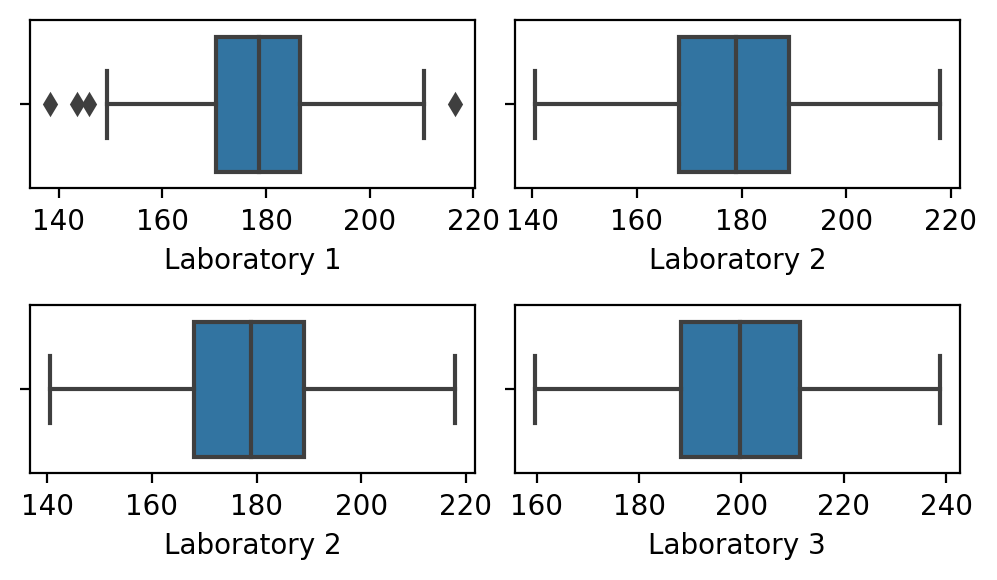

In [75]:
r = 2
c = 2
fig,ax = plt.subplots(r,c)

for i in range(r):
  for j in range(c):
    sns.boxplot(df[df.columns[i+j]], ax = ax[i,j])

plt.tight_layout()

## Outlier Detection

In [86]:
def remove_outlier(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  upper = q3 + (iqr*1.5)
  lower = q1 - (iqr*1.5)
  
  df = df[(df[col]>lower) & (df[col]<upper)]

  return df


In [89]:
df = remove_outlier(df,'Laboratory 1')

<AxesSubplot:xlabel='Laboratory 1'>

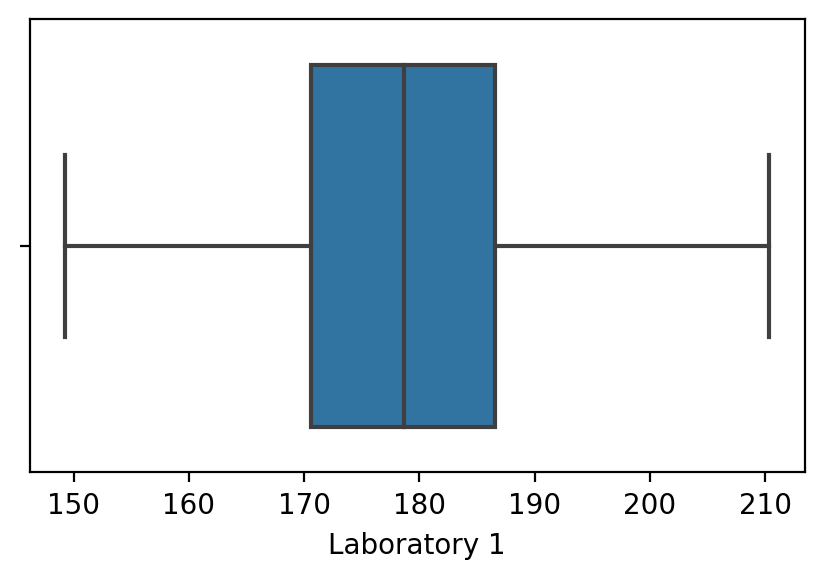

In [90]:
sns.boxplot(df['Laboratory 1'])

## Executing Hypothesis Testing

- **H**(o) : All laboratories average Turn Around Time (TAT) is same
- **H**(a) : Any one laboratories average Turn Around Time (TAT) is different

**Alpha value** : 0.05(*it a 2 tail, 4 sample test*)

In [91]:
alpha = 0.05
statistic,pvalue = st.f_oneway(df['Laboratory 1'],df['Laboratory 2'],df['Laboratory 3'],df['Laboratory 4'])
if pvalue > alpha :
  print("Fail to reject the null hypothesis \n All laboratories average Turn Around Time (TAT) is same.")
else :
  print("rejecting the null hypothesis\n Any one laboratories average Turn Around Time (TAT) is different.")
     

rejecting the null hypothesis
 Any one laboratories average Turn Around Time (TAT) is different.
